In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import scipy.io.wavfile as wavfile

# Larger figure size
fig_size = [14, 8]
plt.rcParams['figure.figsize'] = fig_size

Generate a WAV IQ file at 48ksps containing pulses with 10Hz repetition rate. The duration of each pulse is 10ms.

In [2]:
samp_rate = 48000
pulse_on = samp_rate//100
pulse_off = samp_rate//10 - pulse_on
duration = 600 # seconds
n_pulses = duration * 10
amplitude = 0.01

pulse = np.array([1]*pulse_on + [0]*pulse_off, dtype='float32')
i = amplitude*np.tile(pulse, n_pulses)

iq = np.zeros((len(i),2), dtype='float32')
iq[:,0] = i

wavfile.write('/home/daniel/pulses.wav', rate=samp_rate, data=iq)
del iq
del i

Function to stack up the pulses and plot.

In [3]:
def plot_audio(file):
    audio = np.memmap(file, offset=0x28, dtype=np.int16)
    #audio = np.abs(hilbert(audio)) # improves display, but takes computation time
    pulse_len = 4800
    lines = len(audio)//pulse_len
    plt.imshow(np.abs(audio)[:lines*pulse_len].reshape(lines, pulse_len), cmap='viridis', vmin = 0, vmax=1e4)
    del audio

We open the WAV IQ file in Linrad using `adwav`. The output soundcard is a snd-aloop. The pulses are tuned in SSB mode and the audio output is recorded at 48ksps in Linrad using `'W'`.

The pulses are stacked and plotted. They are slanted, which means that the resampling rate is constant but not correct (not 1:1 from input to output). The results are the same regardless of whether `ntpd` is running.

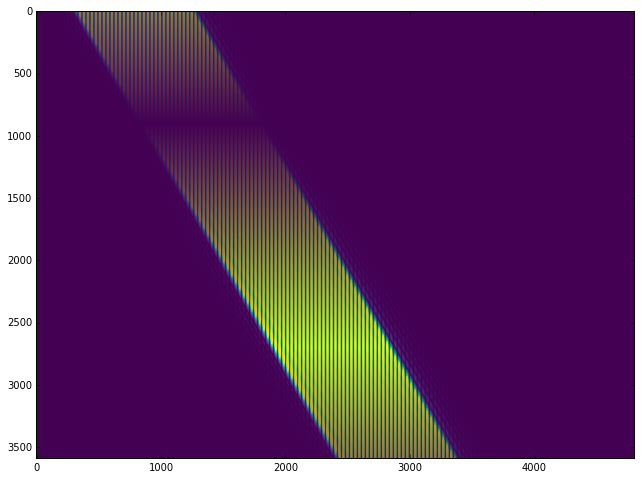

In [4]:
plot_audio('/tmp/output-file-input.wav')

Now we set up the audio input in Linrad to use a snd-aloop device. The WAV IQ file is played into Linrad through snd-aloop using `aplay -D plughw:1,0 ~/pulses.wav` The results seem to depend on whether `ntpd` is running, but now we always see a line with changing slope, meaning that the resampling rate is being adjusted.

This is with `ntpd` not running.

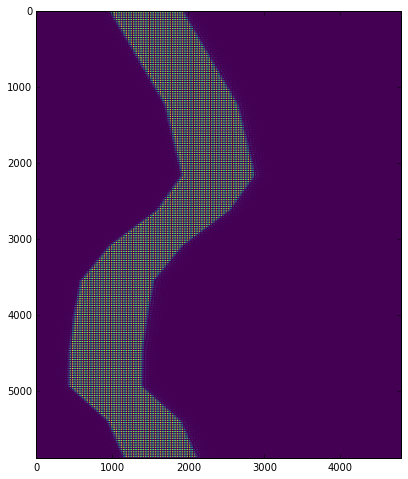

In [5]:
plot_audio('/tmp/output-alsa-ntpd-off.wav')

This is with `ntpd` running. The resampling rate variations sometimes seem much greater.

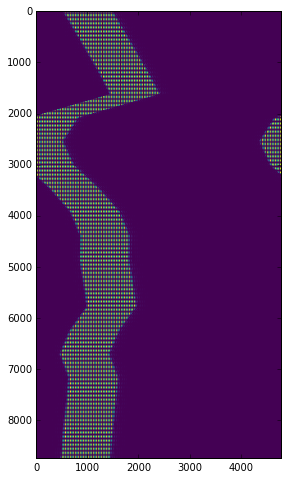

In [6]:
plot_audio('/tmp/output-alsa-ntpd-on.wav')